Upload and load the data

In [2]:
import pandas as pd

# Upload from local (Colab)
from google.colab import files
uploaded = files.upload()

# Load the two CSVs
ndwi_df = pd.read_csv("Monthly_NDWI_Landsat_Export.csv")
climate_df = pd.read_csv("Monthly_Rainfall_Temp_Export.csv")

# Convert both 'Date' columns to standard format
ndwi_df['Date'] = pd.to_datetime(ndwi_df['Date']).dt.to_period('M').dt.to_timestamp()
climate_df['Date'] = pd.to_datetime(climate_df['Date']).dt.to_period('M').dt.to_timestamp()

# Merge
merged_df = pd.merge(ndwi_df[['Date', 'NDWI']],
                     climate_df[['Date', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']],
                     on='Date', how='inner')

# Drop any rows with missing values
merged_df.dropna(inplace=True)

# Check result
merged_df.head()


Saving Monthly_NDWI_Landsat_Export.csv to Monthly_NDWI_Landsat_Export.csv
Saving Monthly_Rainfall_Temp_Export.csv to Monthly_Rainfall_Temp_Export.csv


,Date,NDWI,Rainfall_mm,Tmax_C,Tmin_C
0,2010-01-01,-0.163519,11.074676,23.881618,8.463699
1,2010-02-01,-0.144679,19.892497,28.894566,13.180347
2,2010-04-01,-0.149000,19.427880,39.462312,23.627746
3,2010-05-01,-0.110146,50.153191,38.088555,24.969364
4,2010-06-01,-0.168280,131.872696,34.349364,24.527746


Data Visualisation:NDWI, Rainfall, Temperature Over Time

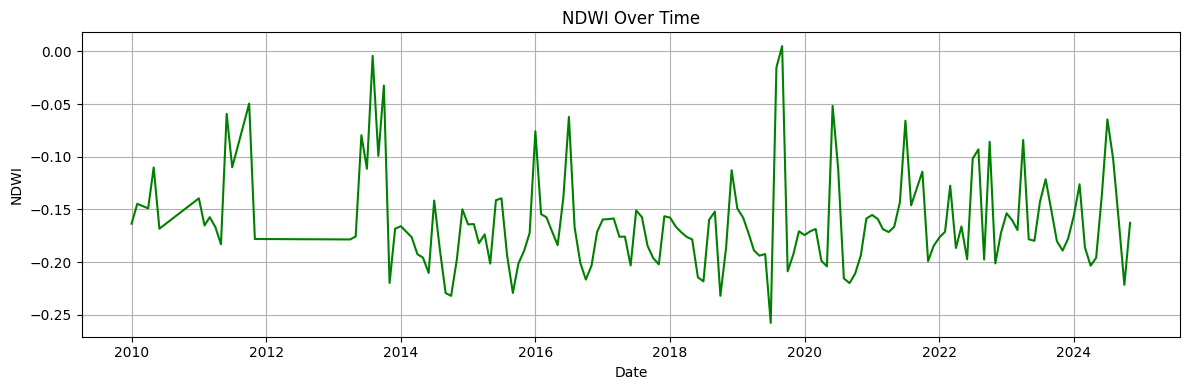

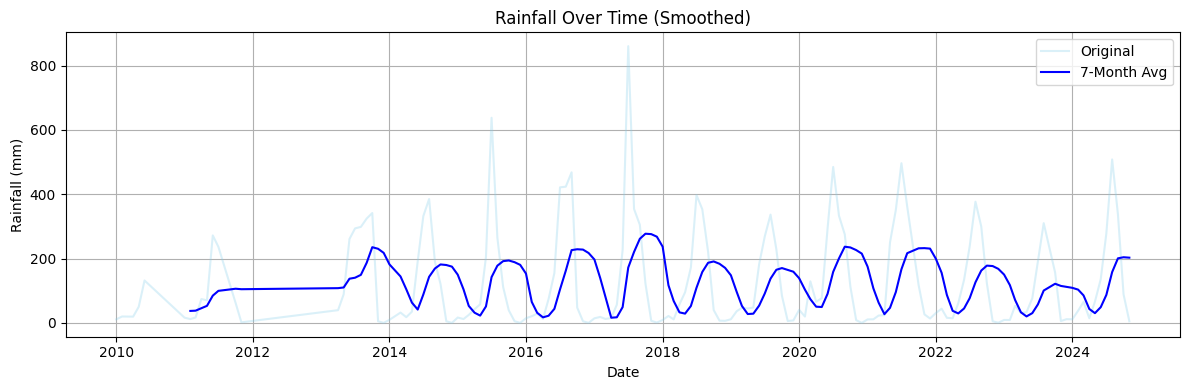

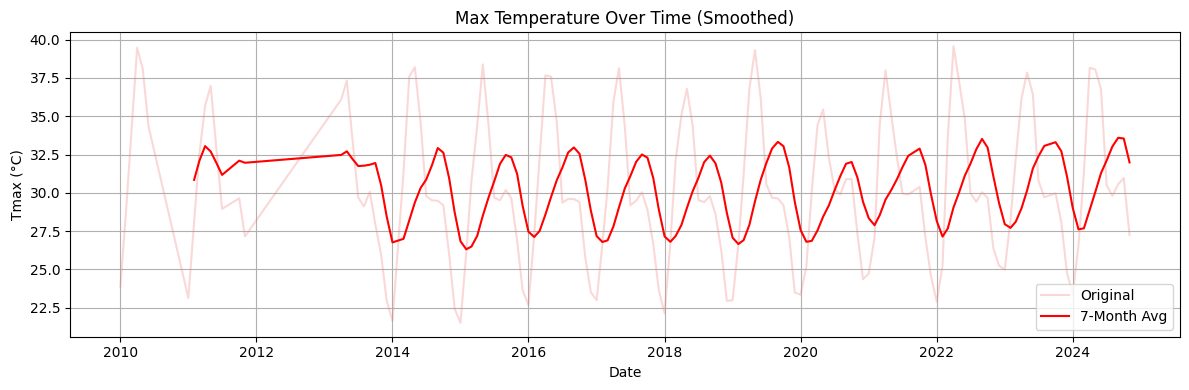

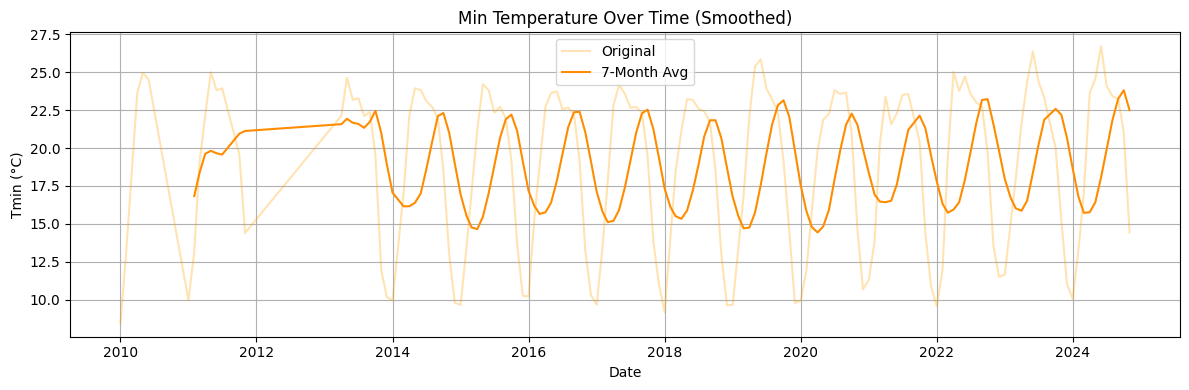

In [3]:
import matplotlib.pyplot as plt

# NDWI over time
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['NDWI'], color='green')
plt.title("NDWI Over Time")
plt.xlabel("Date")
plt.ylabel("NDWI")
plt.grid(True)
plt.tight_layout()
plt.show()

# Add rolling averages to the dataset (7-month moving window)
merged_df['Rainfall_Rolling'] = merged_df['Rainfall_mm'].rolling(window=7).mean()
merged_df['Tmax_Rolling'] = merged_df['Tmax_C'].rolling(window=7).mean()
merged_df['Tmin_Rolling'] = merged_df['Tmin_C'].rolling(window=7).mean()

# Plot Rainfall with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Rainfall_mm'], alpha=0.3, label="Original", color='skyblue')
plt.plot(merged_df['Date'], merged_df['Rainfall_Rolling'], label="7-Month Avg", color='blue')
plt.title("Rainfall Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tmax with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Tmax_C'], alpha=0.3, label="Original", color='lightcoral')
plt.plot(merged_df['Date'], merged_df['Tmax_Rolling'], label="7-Month Avg", color='red')
plt.title("Max Temperature Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Tmax (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tmin with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Tmin_C'], alpha=0.3, label="Original", color='orange')
plt.plot(merged_df['Date'], merged_df['Tmin_Rolling'], label="7-Month Avg", color='darkorange')
plt.title("Min Temperature Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Tmin (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation Heatmap


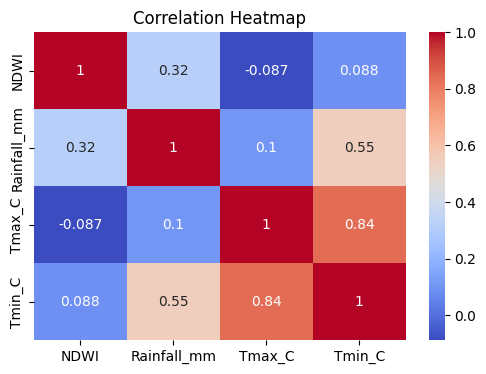

In [4]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(merged_df[['NDWI', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Box Plots: Seasonality & Outliers

In [5]:
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year


/tmp/ipython-input-6-219435146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='NDWI', data=merged_df, palette='Greens')


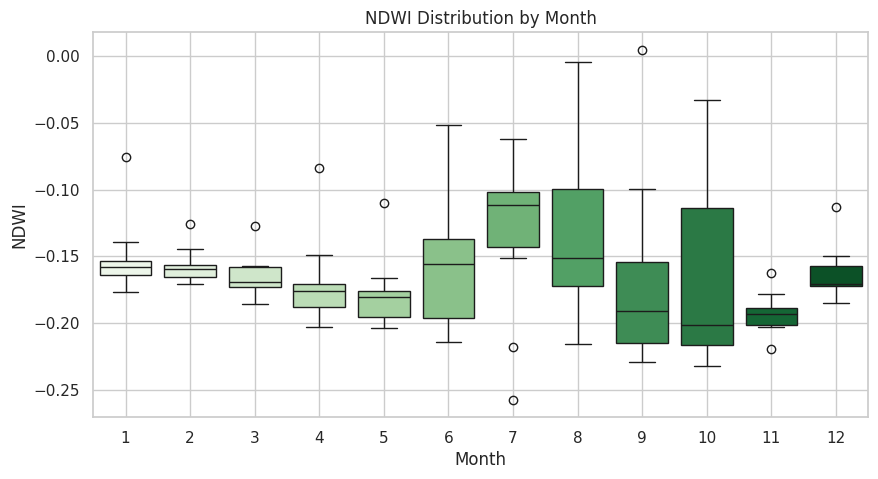

/tmp/ipython-input-6-219435146.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Rainfall_mm', data=merged_df, palette='Blues')


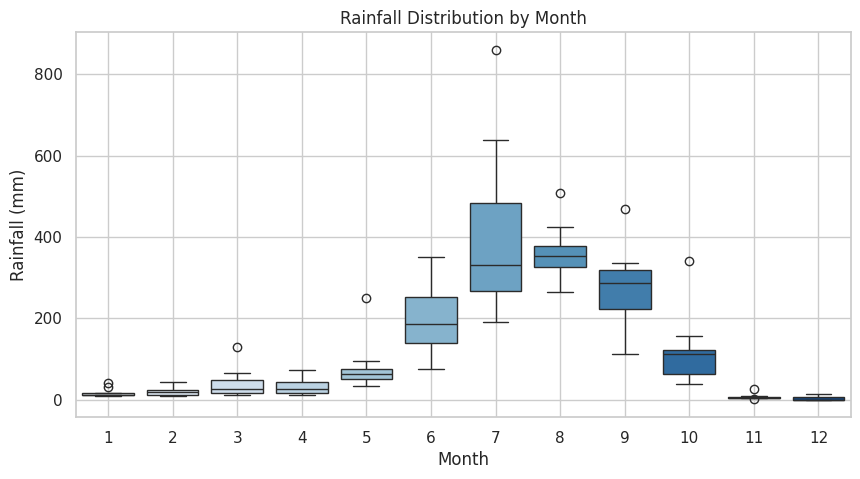

/tmp/ipython-input-6-219435146.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Tmax_C', data=merged_df, palette='Reds')


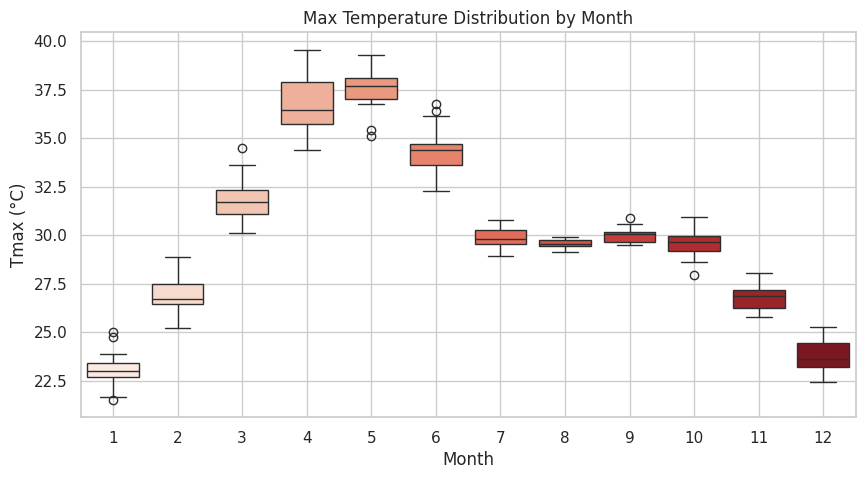

/tmp/ipython-input-6-219435146.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Tmin_C', data=merged_df, palette='Oranges')


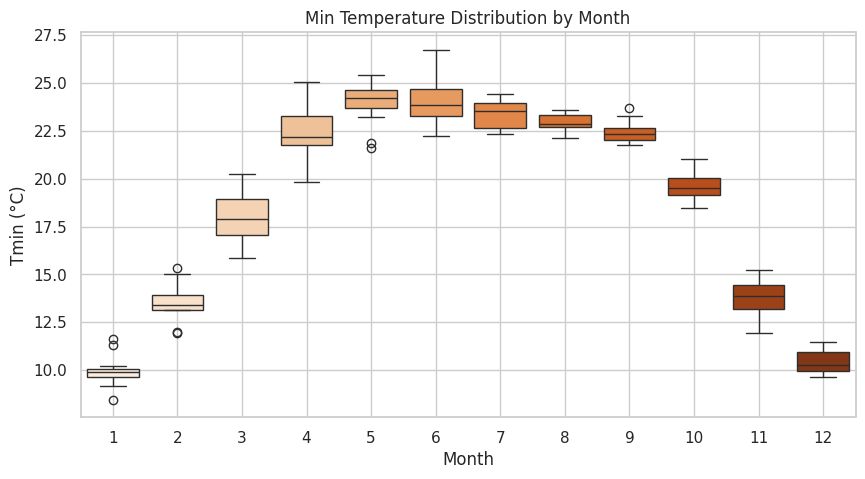

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# 1. NDWI Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='NDWI', data=merged_df, palette='Greens')
plt.title("NDWI Distribution by Month")
plt.xlabel("Month")
plt.ylabel("NDWI")
plt.grid(True)
plt.show()

# 2. Rainfall Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Rainfall_mm', data=merged_df, palette='Blues')
plt.title("Rainfall Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

# 3. Tmax Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Tmax_C', data=merged_df, palette='Reds')
plt.title("Max Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Tmax (°C)")
plt.grid(True)
plt.show()

# 4. Tmin Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Tmin_C', data=merged_df, palette='Oranges')
plt.title("Min Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Tmin (°C)")
plt.grid(True)
plt.show()



plotting Histogram to understand the Distribution the the different Features

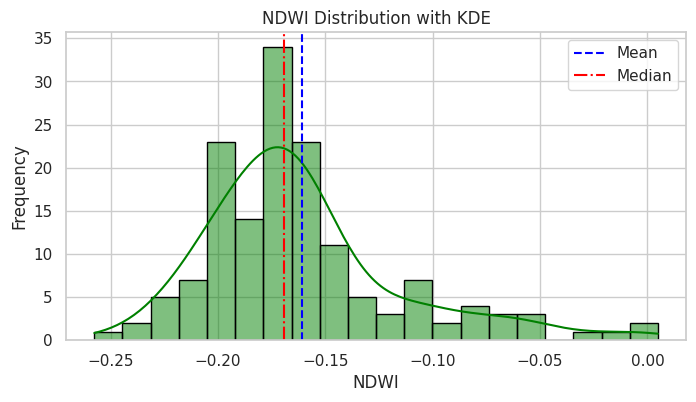

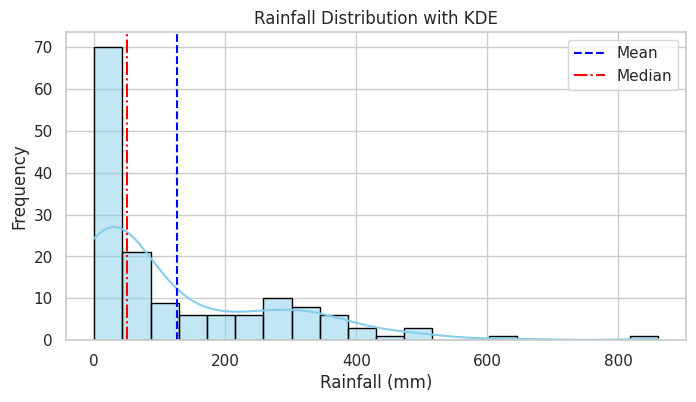

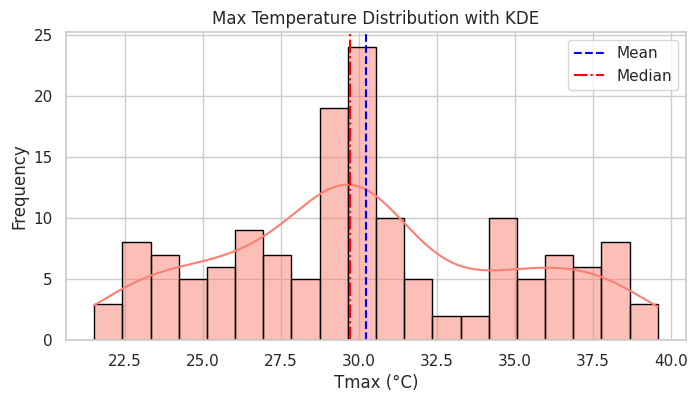

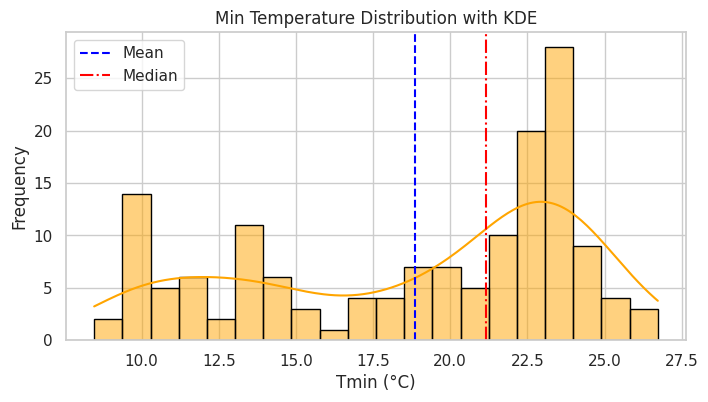

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. NDWI Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['NDWI'], kde=True, color='green', edgecolor='black', bins=20)
plt.axvline(merged_df['NDWI'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['NDWI'].median(), color='red', linestyle='-.', label='Median')
plt.title("NDWI Distribution with KDE")
plt.xlabel("NDWI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 2. Rainfall Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Rainfall_mm'], kde=True, color='skyblue', edgecolor='black', bins=20)
plt.axvline(merged_df['Rainfall_mm'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Rainfall_mm'].median(), color='red', linestyle='-.', label='Median')
plt.title("Rainfall Distribution with KDE")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 3. Tmax Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Tmax_C'], kde=True, color='salmon', edgecolor='black', bins=20)
plt.axvline(merged_df['Tmax_C'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Tmax_C'].median(), color='red', linestyle='-.', label='Median')
plt.title("Max Temperature Distribution with KDE")
plt.xlabel("Tmax (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Tmin Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Tmin_C'], kde=True, color='orange', edgecolor='black', bins=20)
plt.axvline(merged_df['Tmin_C'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Tmin_C'].median(), color='red', linestyle='-.', label='Median')
plt.title("Min Temperature Distribution with KDE")
plt.xlabel("Tmin (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


NDWI + Rainfall Distribution Together to understand points with high NDWI and high rainfall as well as identify the flood thresholds

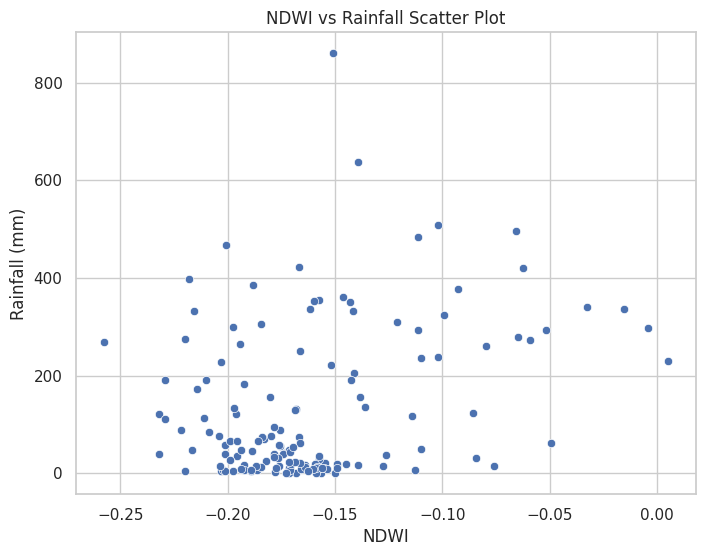

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='NDWI', y='Rainfall_mm')
plt.title("NDWI vs Rainfall Scatter Plot")
plt.xlabel("NDWI")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()


In [9]:
ndwi_75 = merged_df['NDWI'].quantile(0.75)
rain_75 = merged_df['Rainfall_mm'].quantile(0.75)

print(f"NDWI 75th percentile: {ndwi_75}")
print(f"Rainfall 75th percentile: {rain_75}")


NDWI 75th percentile: -0.14907514979618997
Rainfall 75th percentile: 223.97281522433883


Label Data for Classification

In [10]:
def classify(row):
    if row['NDWI'] < 0.1 and row['Rainfall_mm'] < 50:
        return 'Drought'
    elif row['NDWI'] > ndwi_75 and row['Rainfall_mm'] > rain_75:
        return 'Flood'
    else:
        return 'Normal'

merged_df['Condition'] = merged_df.apply(classify, axis=1)


In [11]:
merged_df['Condition'].value_counts()


,count
Condition,
Drought,75
Normal,54
Flood,22


Plot Count of Each Class

/tmp/ipython-input-12-3796512974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Condition', palette='Set2')


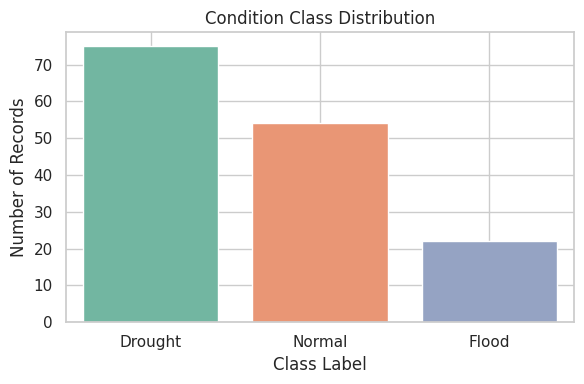

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Condition', palette='Set2')
plt.title("Condition Class Distribution")
plt.ylabel("Number of Records")
plt.xlabel("Class Label")
plt.grid(True)
plt.tight_layout()
plt.show()


Modeling: Random Forest Classification

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode the Condition column
le = LabelEncoder()
merged_df['Condition_encoded'] = le.fit_transform(merged_df['Condition'])

# Show the mapping of labels
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Drought': np.int64(0), 'Flood': np.int64(1), 'Normal': np.int64(2)}


In [14]:
from sklearn.model_selection import train_test_split

X = merged_df[['NDWI', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']]
y = merged_df['Condition_encoded']  # make sure this is encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Training Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate classification report
print(classification_report(
    y_test, y_pred, labels=[0, 1, 2], target_names=le.classes_
))



              precision    recall  f1-score   support

     Drought       1.00      1.00      1.00        15
       Flood       1.00      1.00      1.00         5
      Normal       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [16]:
#saving the predicted levels
merged_df['Predicted'] = clf.predict(X)
merged_df['Predicted_Label'] = merged_df['Predicted'].map(dict(zip(le.transform(le.classes_), le.classes_)))
merged_df.to_csv("final_classification_output.csv", index=False)


Plotting the confusion matrix

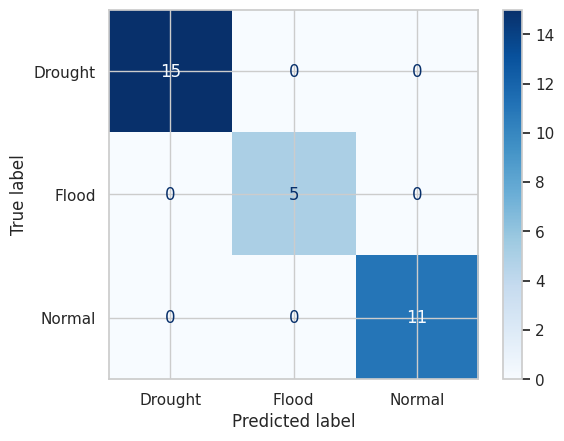

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.show()


**Forecast NDWI using LSTM**

In [18]:
# Load merged dataset or NDWI CSV
df = pd.read_csv("Monthly_NDWI_Landsat_Export.csv")  # replace with merged_df
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'NDWI']].dropna()
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

df.head()


,NDWI
Date,
2010-01-01,-0.163519
2010-02-01,-0.144679
2010-04-01,-0.149000
2010-05-01,-0.110146
2010-06-01,-0.168280


Normalize + Sequence Preparation



In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize NDWI
scaler = MinMaxScaler()
ndwi_scaled = scaler.fit_transform(df[['NDWI']])

# Create sequences
def create_sequences(data, window=12):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(ndwi_scaled, window=window_size)

# Reshape for LSTM [samples, time_steps, features]
print(X.shape, y.shape)


(139, 12, 1) (139, 1)


Train LSTM Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=50, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 0.1706
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1280  
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0958 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0289 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━

NDWI Forecast

In [62]:
# Start with last window
future_preds = []
input_seq = X[-1]

for _ in range(12):  # forecast 12 future months
    pred = model.predict(input_seq.reshape(1, window_size, 1), verbose=0)[0][0]
    future_preds.append(pred)

    # Append and slide window
    input_seq = np.append(input_seq[1:], [[pred]], axis=0)

# Inverse transform to real NDWI values
ndwi_forecast = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Add future dates
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
ndwi_forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_NDWI': ndwi_forecast.flatten()})
ndwi_forecast_df.set_index('Date', inplace=True)
i = int(input("Enter the number of months to forecast: "))
ndwi_forecast_df.head(i)


Enter the number of months to forecast: 10


,Predicted_NDWI
Date,
2024-12-31,-0.163723
2025-01-31,-0.163089
2025-02-28,-0.163153
2025-03-31,-0.163587
2025-04-30,-0.164447
2025-05-31,-0.164332
2025-06-30,-0.163931
2025-07-31,-0.163644
2025-08-31,-0.164267


**Forecasted climate data using Prophet**

In [63]:
import pandas as pd

# Load your uploaded CSV
df = pd.read_csv("/content/Monthly_Rainfall_Temp_Export.csv")

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df = df.set_index('Date')
df = df.sort_index()

# Preview
df.tail()


,system:index,Rainfall_mm,Tmax_C,Tmin_C,.geo
Date,,,,,
2024-07-01,174,278.276157,30.501850,24.100925,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-08-01,175,508.259504,29.813642,23.421387,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-09-01,176,337.101196,30.560925,23.261387,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-10-01,177,88.705994,30.967168,21.024740,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-11-01,178,5.061851,27.254104,14.430173,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [64]:
from prophet import Prophet

def forecast_column(data, column_name, periods=12):
    df_prophet = data[[column_name]].reset_index().rename(columns={'Date': 'ds', column_name: 'y'})

    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=periods, freq='MS')  # 'MS' = Month Start
    forecast = model.predict(future)

    result = forecast[['ds', 'yhat']].tail(periods).copy()
    result = result.rename(columns={'ds': 'Date', 'yhat': f"{column_name}_forecast"})
    result = result.set_index('Date')

    return result


In [65]:
rainfall_forecast = forecast_column(df, 'Rainfall_mm')
tmax_forecast = forecast_column(df, 'Tmax_C')
tmin_forecast = forecast_column(df, 'Tmin_C')

# Merge all forecasts
climate_forecast = rainfall_forecast \
    .join(tmax_forecast, how='inner') \
    .join(tmin_forecast, how='inner')
month = int(input("Enter the number of months to forecast: "))
climate_forecast.head(month)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3tmokfn/m6amoivw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3tmokfn/gja80kgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17516', 'data', 'file=/tmp/tmpv3tmokfn/m6amoivw.json', 'init=/tmp/tmpv3tmokfn/gja80kgc.json', 'output', 'file=/tmp/tmpv3tmokfn/prophet_modelj3gqrtv3/prophet_model-20250701074613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

Enter the number of months to forecast: 10


,Rainfall_mm_forecast,Tmax_C_forecast,Tmin_C_forecast
Date,,,
2024-12-01,4.404320,24.755873,11.379467
2025-01-01,20.101137,24.219502,10.678204
2025-02-01,27.110261,27.599739,14.347738
2025-03-01,40.340123,33.008038,18.911673
2025-04-01,39.078851,37.723249,23.392907
2025-05-01,76.904870,38.368940,24.793093
2025-06-01,201.444405,35.355437,25.089701
2025-07-01,385.680157,30.759433,24.333872
2025-08-01,358.939905,30.505025,23.946727


# **Final Prediction**

In [66]:
import pandas as pd

# Copy and prepare data
ndwi_forecast_df = ndwi_forecast_df.copy()
climate_forecast_df = climate_forecast.copy()

# Convert 'Date' column to datetime and set as index
if 'Date' in ndwi_forecast_df.columns:
    ndwi_forecast_df['Date'] = pd.to_datetime(ndwi_forecast_df['Date'])
    ndwi_forecast_df.set_index('Date', inplace=True)

if 'Date' in climate_forecast_df.columns:
    climate_forecast_df['Date'] = pd.to_datetime(climate_forecast_df['Date'])
    climate_forecast_df.set_index('Date', inplace=True)

# Align both DataFrames to month start for consistent merging
ndwi_forecast_df.index = ndwi_forecast_df.index.to_period('M').to_timestamp()
climate_forecast_df.index = climate_forecast_df.index.to_period('M').to_timestamp()

# Merge both forecasts on index (Date)
combined_forecast = pd.merge(climate_forecast_df, ndwi_forecast_df,
                             left_index=True, right_index=True, how='inner')

# Define the classification rule
def classify_condition(row):
    ndwi = row['Predicted_NDWI']
    rainfall = row['Rainfall_mm_forecast']

    if ndwi < -0.15 and rainfall < 50:
        return 'Drought'
    elif ndwi > -0.17 and rainfall > 200:
        return 'Flood'
    else:
        return 'Normal'

# Apply classification
combined_forecast['Predicted_Condition'] = combined_forecast.apply(classify_condition, axis=1)

# Ask user for months to display
try:
    month = int(input("Enter the number of months to forecast: "))
except ValueError:
    print("Invalid input. Defaulting to 12 months.")
    month = 12

# Prepare and print the output
combined_forecast.reset_index(inplace=True)
final_result = combined_forecast[['Date', 'Predicted_NDWI', 'Rainfall_mm_forecast', 'Predicted_Condition']].head(month)

print("\nFuture Water Condition Forecast:\n")
print(final_result.to_string(index=False))


Enter the number of months to forecast: 10

Future Water Condition Forecast:

      Date  Predicted_NDWI  Rainfall_mm_forecast Predicted_Condition
2024-12-01       -0.163723              4.404320             Drought
2025-01-01       -0.163089             20.101137             Drought
2025-02-01       -0.163153             27.110261             Drought
2025-03-01       -0.163587             40.340123             Drought
2025-04-01       -0.164447             39.078851             Drought
2025-05-01       -0.164332             76.904870              Normal
2025-06-01       -0.163931            201.444405               Flood
2025-07-01       -0.163644            385.680157               Flood
2025-08-01       -0.164267            358.939905               Flood
2025-09-01       -0.165965            289.269768               Flood


Visualization

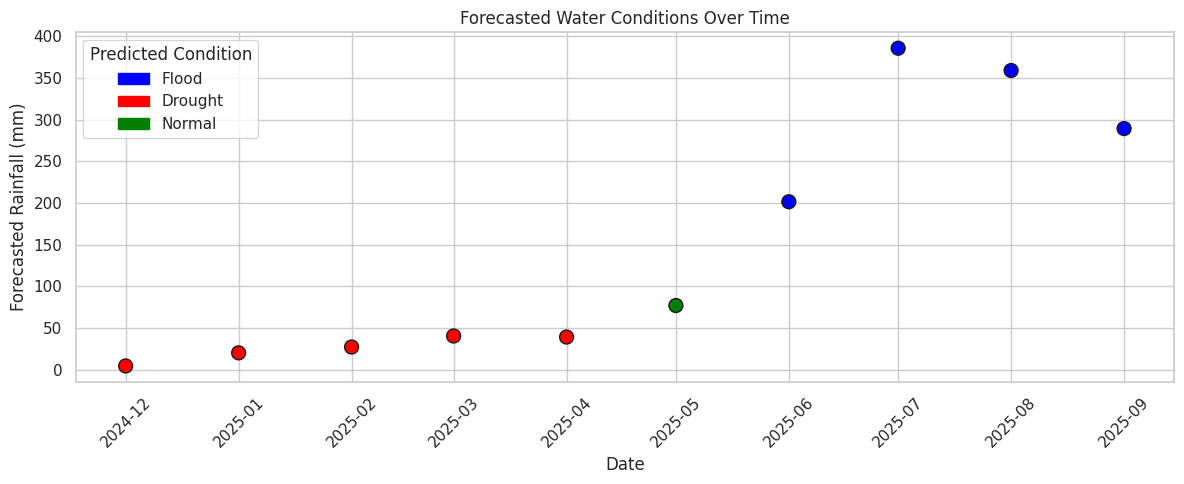

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

final_result['Date'] = pd.to_datetime(final_result['Date'])

color_map = {
    'Flood': 'blue',
    'Drought': 'red',
    'Normal': 'green'
}

colors = final_result['Predicted_Condition'].map(color_map)

plt.figure(figsize=(12, 5))
plt.scatter(final_result['Date'], final_result['Rainfall_mm_forecast'], c=colors, s=100, marker='o', edgecolors='k')
plt.title("Forecasted Water Conditions Over Time")
plt.xlabel("Date")
plt.ylabel("Forecasted Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(True)

legend_patches = [mpatches.Patch(color=clr, label=label) for label, clr in color_map.items()]
plt.legend(handles=legend_patches, title="Predicted Condition")

plt.tight_layout()
plt.show()


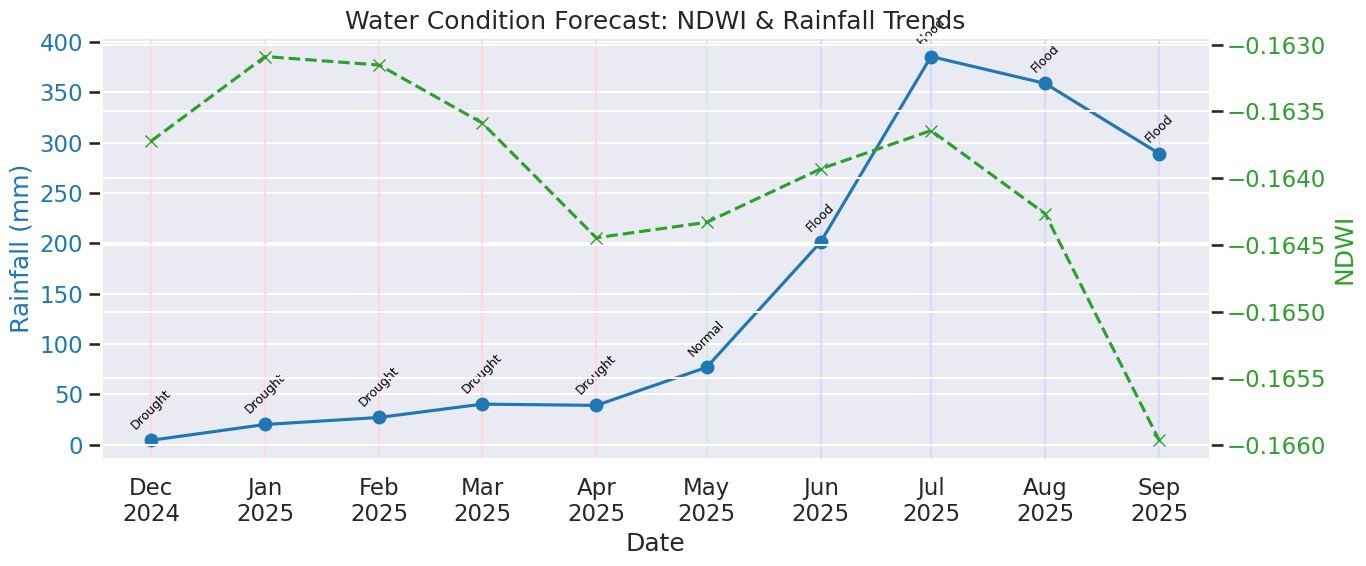

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Make sure 'Date' is datetime format
final_result['Date'] = pd.to_datetime(final_result['Date'])

# Set seaborn theme (no need for matplotlib style)
sns.set_theme(style="darkgrid", context="talk")

# Create figure and dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Rainfall
ax1.set_xlabel("Date")
ax1.set_ylabel("Rainfall (mm)", color='tab:blue')
ax1.plot(final_result['Date'], final_result['Rainfall_mm_forecast'],
         color='tab:blue', marker='o', label='Rainfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot NDWI on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("NDWI", color='tab:green')
ax2.plot(final_result['Date'], final_result['Predicted_NDWI'],
         color='tab:green', linestyle='--', marker='x', label='NDWI')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Shade regions based on condition
for _, row in final_result.iterrows():
    condition_color = {
        'Flood': 'blue',
        'Drought': 'red',
        'Normal': 'green'
    }.get(row['Predicted_Condition'], 'gray')

    ax1.axvspan(row['Date'], row['Date'], color=condition_color, alpha=0.15)

# Annotate each point
for _, row in final_result.iterrows():
    ax1.annotate(row['Predicted_Condition'],
                 xy=(row['Date'], row['Rainfall_mm_forecast']),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 rotation=45,
                 color='black')

# Format x-axis dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Title and layout
plt.title("Water Condition Forecast: NDWI & Rainfall Trends")
fig.tight_layout()
plt.show()
